In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
collection_9suk = db['kto9suk9suk_review']
collection_yeomi = db['yeomi_review']

data_consume_9suk = collection_9suk.find()
data_consume_yeomi = collection_yeomi.find()

df_consume_9suk = pd.DataFrame(data_consume_9suk)
df_consume_yeomi = pd.DataFrame(data_consume_yeomi)

### 데이터 가져오기

In [2]:
# 텍스트 파일 경로
file_path = 'steam.txt'

# 텍스트 파일 읽기
with open(file_path, 'r') as file:
    read_data = file.read()

In [3]:
import pandas as pd
from io import StringIO

# 텍스트 데이터를 파일 객체로 변환
file_obj = StringIO(read_data)
file_obj
# 데이터프레임 생성
df_labeled = pd.read_csv(file_obj, sep='\t')
df_labeled

,0,노래가 너무 적음
0,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
1,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
2,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
3,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
4,1,역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
...,...,...
99994,0,한글화해주면 10개산다
99995,0,개쌉노잼 ㅋㅋ
99996,0,노잼이네요... 30분하고 지웠어요...
99997,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [4]:
df_labeled.columns = ["sentiment","comment"]
new_record = {'sentiment': 0, 'comment': "노래가 너무 적음"}
df_labeled = pd.concat([df_labeled, pd.DataFrame([new_record])], ignore_index=True)
df_labeled

,sentiment,comment
0,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
1,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
2,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
3,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
4,1,역시 재미있네요 전작에서 할수 없었던 자유로운 덱 빌딩도 좋네요^^
...,...,...
99995,0,개쌉노잼 ㅋㅋ
99996,0,노잼이네요... 30분하고 지웠어요...
99997,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.
99998,1,한국의 메탈레이지를 떠오르게한다 진짜 손맛으로 하는게임


In [5]:
df_consume_9suk

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [6]:
df_consume_yeomi

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f9bf1f08bfcc46ca19353d,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,NaN,NaN
1,65f9bf1f08bfcc46ca19353e,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,혹시 이 전거는 복구 안되나요..?,2018년 8월 10일
2,65f9bf1f08bfcc46ca19353f,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@jjuning__ 살면서 처음 밟아보는 빙하 위에서의 위스키 한잔이란~~~~~~~😆🍻👍,2018년 1월 23일
3,65f9bf1f08bfcc46ca193540,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@dong_man_kim 오 동만쓰~,2018년 1월 22일
4,65f9bf1f08bfcc46ca193541,".\n#엘칼라파테, #ElCalafate #아르헨티나, #Argentina\n.\n...",2018년 1월 21일,6492,,BeMmKk5h8aX,@ihpa_999999999 갈래갈래,2018년 1월 22일
...,...,...,...,...,...,...,...,...
1152553,662f1f95777cf716ba28134f,".\n#시즈오카, #Shizuoka, #일본, #Japan\n.\n.\n누가 호텔 ...",2018년 2월 4일,1만,,BewaM05BHcA,NaN,NaN
1152554,662f1f9b777cf716ba281350,".\n#양곤, #Yangon, #미얀마, #Myanmar\n.\n.\n2년 전 사진...",2018년 2월 14일,7176,,BfLaqG4hS_k,NaN,NaN
1152555,662f1fa1777cf716ba281351,".\n#프라하, #Prague, #체코, #Czech\n.\n프라하성까지 걸어올라가...",2018년 2월 28일,9860,,BfuYMBHB8XE,NaN,NaN
1152556,662f2a098eaf5853dcbbf1fb,".\n#시즈오카, #Shizuoka, #일본, #Japan\n.\n.\n누가 호텔 ...",2018년 2월 4일,1만,,BewaM05BHcA,NaN,NaN


In [7]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in df_consume_yeomi[df_consume_yeomi['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = df_consume_yeomi.query(condition_region)

df_sns = pd.concat([df_consume_9suk, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


In [8]:
df_sns_review = df_sns.dropna()
df_sns_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일
6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014년 7월 10일
8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일
...,...,...,...,...,...,...,...,...
599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


In [9]:
import re
# 불용어 처리 함수 정의
def remove_special_words(text):
    text = text.str.replace(r'@\w+', '', regex=True) # @로시작하는 단어 삭제
    text = text.str.replace(r'[^\w\s]', '', regex=True) # 이모티콘 삭제
    return text

# 새로운 컬럼에 불용어 처리된 데이터 추가
df_sns_review['review_content_clean'] = remove_special_words(df_sns_review['review_content'])
df_sns_review

/tmp/ipykernel_259/80101243.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sns_review['review_content_clean'] = remove_special_words(df_sns_review['review_content'])


,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,review_content_clean
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일,정말 아름다워요
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일,멋진 섬이네요
5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일,저 말이 되고싶어요
6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014년 7월 10일,Beautiful
8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,근데 명산도는 34월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은 아녜요
...,...,...,...,...,...,...,...,...,...
599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일,
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일,미츠바 좋습니당
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,와 이제 곧 장미공원의 시즌이다
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,혹시 여기 다 가본 사람 있어 어디가 젤 좋았는지 추천해주라줘


### 머신러닝 모델 선정

#### 1. 훈련용,시험용 데이터셋 설정

In [10]:
from sklearn.model_selection import train_test_split
labeled_x = df_labeled['comment']
labeled_y = df_labeled['sentiment']
labeled_x_train,labeled_x_test = train_test_split(labeled_x,test_size=0.3,random_state=42)
labeled_y_train,labeled_y_test = train_test_split(labeled_y,test_size=0.3,random_state=42)

In [11]:
labeled_x_test

75721    짧고 굵다 좋은 아이디어를 가졋음에도 플레이타임에 집착하느라 질질 끌어서 게임 자체...
80184    분위기 깡패. 플레이 하는 사람 따라서 심리적으로 힘들수도 있을것 같습니다. 살인,...
19864    단순하고 심플하지만 사람 짜증나게 하고 몇번씩 종료 시키게 만드는 뭐 같은 게임의욕...
76699                                          오우 바니걸 먹는다!
92991    3300원이 아깝지 않다. 방패로 싸우고 활로 싸우고 검으로 싸우고 총으로 싸우고아...
                               ...                        
42648                                               돈장난이 좀
86306                         스토리 텔링이 너무 마음에 들었어요! 수작! 강추!
45466    스토리 몰입도가 엄청나서 게임킬때마다 켠김왕을 하게 되어버린다. 이제 2회차째 '-...
63724    길은 드럽게 복잡함 그래픽도 아웃라스트보다 떨어짐 갑툭튀도 없고 쫓기는 씬도 없고 ...
34122    '이시대 최고의 망겜' 레벨이 8까지 있는데 운나쁘면 버그생겨서 못깸. 무료로 받아...
Name: comment, Length: 30000, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,2))
labeled_x_train = tfidfVectorizer.fit_transform(labeled_x_train)
labeled_x_test = tfidfVectorizer.transform(labeled_x_test)
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['00', '00 12', '000', ...,
       '９年も前のゲームにハードモードが追加されてた ホラーゲームの中で一番好きな作品だから嬉しい', 'ｚｌｑｈｊd아니시발',
       'ｚｌｑｈｊd아니시발 키보드설정이'], dtype=object)

#### 2. 랜덤포레스트

In [13]:
from sklearn.ensemble import RandomForestClassifier
classification_topic = RandomForestClassifier(n_jobs=-1)
classification_topic.fit(labeled_x_train, labeled_y_train)

RandomForestClassifier(n_jobs=-1)

In [14]:
# classification_report로 model 성능 확인
labeled_y_train_predict = classification_topic.predict(labeled_x_train)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     34843
           1       1.00      0.99      1.00     35157

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000



In [15]:
labeled_y_test_predict = classification_topic.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73     15161
           1       0.73      0.70      0.72     14839

    accuracy                           0.73     30000
   macro avg       0.73      0.73      0.73     30000
weighted avg       0.73      0.73      0.73     30000



#### 3. 로지스틱 회귀분석

In [16]:
from sklearn import linear_model
logisticRegression=linear_model.LogisticRegression()
logisticRegression.fit(labeled_x_train,labeled_y_train)

LogisticRegression()

In [17]:
labeled_y_train_predict = logisticRegression.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     34843
           1       0.93      0.93      0.93     35157

    accuracy                           0.93     70000
   macro avg       0.93      0.93      0.93     70000
weighted avg       0.93      0.93      0.93     70000



In [18]:
labeled_y_test_predict = logisticRegression.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76     15161
           1       0.74      0.78      0.76     14839

    accuracy                           0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000



#### 4. K-최근접 이웃

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(labeled_x_train, labeled_y_train)

KNeighborsClassifier()

In [20]:
labeled_y_train_predict = knn.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     34843
           1       0.70      0.68      0.69     35157

    accuracy                           0.69     70000
   macro avg       0.70      0.69      0.69     70000
weighted avg       0.70      0.69      0.69     70000



In [21]:
labeled_y_test_predict = knn.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.52      0.56      0.54     15161
           1       0.51      0.48      0.49     14839

    accuracy                           0.52     30000
   macro avg       0.52      0.52      0.52     30000
weighted avg       0.52      0.52      0.52     30000



#### 5. SVM

In [22]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(labeled_x_train, labeled_y_train)

SVC()

In [23]:
labeled_y_train_predict = svm_model.predict(labeled_x_train)
# classification_report로 model 성능 확인
from sklearn.metrics import classification_report
print(classification_report(labeled_y_train, labeled_y_train_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     34843
           1       0.99      0.99      0.99     35157

    accuracy                           0.99     70000
   macro avg       0.99      0.99      0.99     70000
weighted avg       0.99      0.99      0.99     70000



In [24]:
labeled_y_test_predict = svm_model.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77     15161
           1       0.77      0.73      0.75     14839

    accuracy                           0.76     30000
   macro avg       0.76      0.76      0.76     30000
weighted avg       0.76      0.76      0.76     30000



#### 6. 모델 결과

- Logistic Regression과 SVM 모델이 0.76의 정확성으로 모델들 중 가장 우수한 성능을 보인다.
- 이 두 모델을 선정하여 하이퍼 파라미터를 이용한 성능 개발 적용할 것

### 하이퍼 파라미터 적용 및 모델 성능 향상

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# 탐색할 하이퍼파라미터 설정
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(logisticRegression, param_grid, cv=5)
grid_search.fit(labeled_x_train, labeled_y_train)

# 최적의 하이퍼파라미터 출력
print("최적 하이퍼파라미터:", grid_search.best_params_)

# 최적의 모델로 예측
logistic_best_model = grid_search.best_estimator_       

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solver = _check_solver

최적 하이퍼파라미터: {'C': 10, 'penalty': 'l2'}


In [27]:
labeled_y_test_predict = logistic_best_model.predict(labeled_x_test)
from sklearn.metrics import classification_report
print(classification_report(labeled_y_test, labeled_y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     15161
           1       0.75      0.78      0.77     14839

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



### 머신러닝 모델 적용

In [29]:
x_review = tfidfVectorizer.transform(df_sns_review['review_content_clean'])
df_sns_review["sentiment"] = logistic_best_model.predict(x_review)
df_sns_review

/tmp/ipykernel_259/1794234541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sns_review["sentiment"] = logistic_best_model.predict(x_review)


,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,review_content_clean,sentiment
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일,정말 아름다워요,1
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일,멋진 섬이네요,1
5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014년 7월 10일,저 말이 되고싶어요,1
6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014년 7월 10일,Beautiful,1
8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014년 8월 5일,근데 명산도는 34월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은 아녜요,1
...,...,...,...,...,...,...,...,...,...,...
599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024년 4월 24일,,1
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일,미츠바 좋습니당,1
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일,와 이제 곧 장미공원의 시즌이다,1
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일,혹시 여기 다 가본 사람 있어 어디가 젤 좋았는지 추천해주라줘,0


### 댓글 감정분석

#### 전체

In [38]:
df_negative = df_sns_review.query("sentiment == 0")
df_positive = df_sns_review.query("sentiment == 1")
len(df_positive["review_content_clean"]),len(df_negative["review_content_clean"])

(503107, 90859)

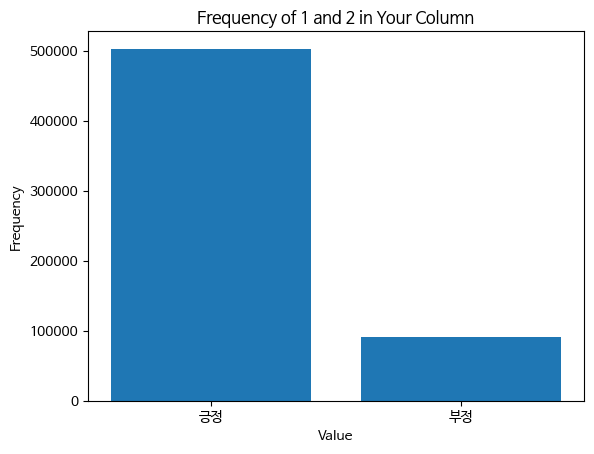

In [45]:
# 데이터프레임에서 특정 컬럼의 값 빈도수 계산

# 그래프 그리기
plt.bar(['긍정', '부정'], [len(df_positive["review_content_clean"]), len(df_negative["review_content_clean"])])
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of 1 and 2 in Your Column')
plt.show()

결과 : 긍정의 빈도 수가 부정의 빈도 수보다 약 5배 가량 높은 것을 확인

#### 연도별

In [49]:
df_sns_review['review_date'] = pd.to_datetime(df_sns_review['review_date'], format='%Y년 %m월 %d일')
df_sns_review

/tmp/ipykernel_259/1091070430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sns_review['review_date'] = pd.to_datetime(df_sns_review['review_date'], format='%Y년 %m월 %d일')


,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,review_content_clean,sentiment
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014-07-09,정말 아름다워요,1
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014-06-24,멋진 섬이네요,1
5,65f99f8b08bfcc46ca193522,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,저 말이 되고싶어요^^,2014-07-10,저 말이 되고싶어요,1
6,65f99f8b08bfcc46ca193523,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,Beautiful~,2014-07-10,Beautiful,1
8,65f99f8d08bfcc46ca193525,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,근데 명산도는 3~4월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은...,2014-08-05,근데 명산도는 34월 물이 빠지면 걸어들갈 수는 있으나 평상시 여행할 수있는 섬은 아녜요,1
...,...,...,...,...,...,...,...,...,...,...
599152,662af285f231019cd5b6186d,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,@ssukssuk_growup,2024-04-24,,1
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024-04-26,미츠바 좋습니당,1
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024-04-26,와 이제 곧 장미공원의 시즌이다,1
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024-04-26,혹시 여기 다 가본 사람 있어 어디가 젤 좋았는지 추천해주라줘,0


In [51]:
df_sns_review["review_date"].dt.year.unique()

array([2014, 2015, 2021, 2018, 2016, 2020, 2019, 2017, 2023, 2024, 2022],
      dtype=int32)

In [ ]:
data_2014 = df_sns_review[df_sns_review['review_date'].dt.year == 2014]

### 참조페이지

https://github.com/bab2min/corpus/tree/master/sentiment